In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import scipy.stats as stats
import math
from collections import defaultdict
from scipy.stats.stats import pearsonr

/var/folders/pm/dkdy0wln1y756n114t32fykc0000gn/T/ipykernel_79285/2944278654.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [4]:
# import dataset
df = pd.read_csv("dataset-progetto/train.csv", skipinitialspace=True)
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [5]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [6]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000
mean,2.468075e+05,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647
std,1.279941e+05,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616
min,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116
25%,1.800000e+05,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953
50%,2.278260e+05,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916
75%,2.889030e+05,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057
max,4.120258e+06,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,4.120258e+06,5.000000,7348.000000,2170.00000,1.000000,4.067086


In [7]:
df.shape
#15000 righe 
#24 colonne/ attributi

(15000, 24)

In [8]:
#shape è un metodo e non una funzione , quindi non cu metto le parentesi perchè tanto non accetta parametri 

Column description

- **name**: OBJECT			
Name of the track
- **duration_ms**: 	 INT   
The track length in milliseconds
- **explicit**:     BOOL
Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **popularity**: 	INT    
The popularity of a track is a value between 0 and 100, with 100 being the most popular. 
- **artists**: 		OBJECT	
The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name**: 	 	OBJECT	
The album name in which the track appears
- **danceability**: 		FLOAT
Danceability describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable    
- **energy**: 			FLOAT
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
- **key**:			INT	
The key the track is in. Integers map to pitches using standard Pitch Class notation. 
- **loudness**: 		FLOAT	
The overall loudness of a track in decibels (dB)
- **mode**:				FLOAT?
Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0
- **speechiness**: 		FLOAT?	
Speechiness detects the presence of spoken words in a track. 
- **acousticness**:		FLOAT	
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness**:  FLOAT 
Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0		
- **liveness**:	FLOAT		
Detects the presence of an audience in the recording. 
- **valence**:	FLOAT		
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
- **tempo**:			
The overall estimated tempo of a track in beats per minute (BPM). 
- **features_duration_ms**: 	
The duration of the track in milliseconds
- **time_signature**:		
An estimated time signature. 
- **n_beats**:			
The total number of time intervals of beats throughout the track. 
- **n_bars**:			
The total number of time intervals of the bars throughout the track. 
- **popularity_confidence**: 	
The confidence, from 0.0 to 1.0, of the popularity of the song.
- **processing**:			
............
- **genre**:			
The genre in which the track belongs

In [9]:
df.dtypes

name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

<AxesSubplot:xlabel='popularity', ylabel='duration_ms'>

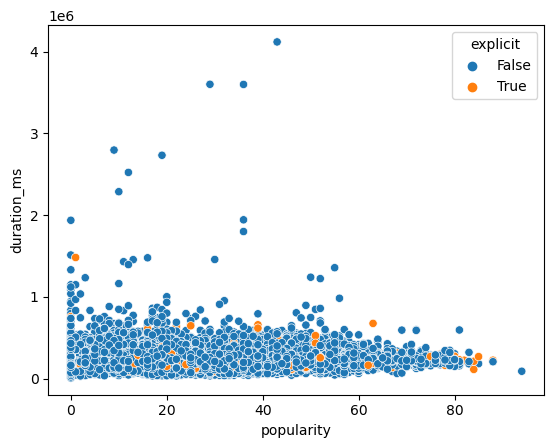

In [11]:
#we can also use sns istead of plt
sns.scatterplot(data=df,x='popularity',y='duration_ms',hue='explicit')
#hue = the countercondition

In [12]:
df.isnull().any()

name                     False
duration_ms              False
explicit                 False
popularity               False
artists                  False
album_name               False
danceability             False
energy                   False
key                      False
loudness                 False
mode                      True
speechiness              False
acousticness             False
instrumentalness         False
liveness                 False
valence                  False
tempo                    False
features_duration_ms     False
time_signature            True
n_beats                  False
n_bars                   False
popularity_confidence     True
processing               False
genre                    False
dtype: bool

In [13]:
#attributi con valori nulli
#-mode
#time_signature
#popularity_confidence

In [14]:
df.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

In [15]:
#mode                    4450
#time_signature         2062
#popularity_confidence  12783

#numero di valori nulli per questi attributi

### time_siganture

In [16]:
df['time_signature']

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
14995    NaN
14996    3.0
14997    4.0
14998    4.0
14999    4.0
Name: time_signature, Length: 15000, dtype: float64

In [17]:
df['time_signature'].describe()

count    12938.000000
mean         3.876179
std          0.566491
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64

In [18]:
#df[df['time_signature'] == 1.0]['time_signature']

In [19]:
df['time_signature'].unique()

array([ 4., nan,  3.,  5.,  1.,  0.])

In [20]:
#è possibile che un brano abbiamo time signature 0 o 1 o 5?

In [21]:
#ci sarebbe da trovare una correlazione fra time_signature e qualche altro attributo per sostituire i missing values

### popularity_confidence

In [22]:
df['popularity_confidence'].describe()

count    2217.000000
mean        0.490479
std         0.291330
min         0.000000
25%         0.230000
50%         0.480000
75%         0.739000
max         1.000000
Name: popularity_confidence, dtype: float64

In [23]:
df['popularity_confidence'].unique()

array([  nan, 0.469, 0.69 , 0.353, 0.525, 0.786, 0.889, 0.972, 0.106,
       0.415, 0.869, 0.738, 0.026, 0.146, 0.507, 0.851, 0.24 , 0.28 ,
       0.859, 0.21 , 0.998, 0.659, 0.286, 0.104, 0.594, 0.193, 0.721,
       0.695, 0.226, 0.462, 0.127, 0.754, 0.122, 0.12 , 0.821, 0.254,
       0.872, 0.96 , 0.086, 0.185, 0.552, 0.208, 0.232, 0.768, 0.617,
       0.714, 0.586, 0.212, 0.497, 0.316, 0.476, 0.561, 0.562, 0.039,
       0.347, 0.981, 0.253, 0.038, 0.466, 0.491, 0.161, 0.68 , 0.915,
       0.442, 0.447, 0.123, 0.417, 0.475, 0.549, 0.593, 0.306, 0.831,
       0.563, 0.542, 0.626, 0.622, 0.237, 0.729, 0.22 , 0.837, 0.607,
       0.359, 0.753, 0.707, 0.425, 0.523, 0.313, 0.505, 0.3  , 0.112,
       0.655, 0.042, 0.301, 0.979, 0.426, 0.332, 0.173, 0.249, 0.079,
       0.916, 0.727, 0.604, 0.725, 0.083, 0.077, 0.815, 0.6  , 0.446,
       0.377, 0.787, 0.846, 0.094, 0.046, 0.638, 0.539, 0.973, 0.385,
       0.477, 0.014, 0.261, 0.312, 0.769, 0.413, 0.147, 0.177, 0.215,
       0.935, 0.179,

In [24]:
len(df['popularity_confidence'].unique())
#per contare il numero di valor unici

886

In [25]:
#per i missing values potremmo
# vedere se c'è correlazione con un altro attributo 

### mode

In [26]:
#Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0

In [27]:
df['mode'].describe()

count    10550.000000
mean         0.631374
std          0.482455
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64

In [28]:
df['mode'].unique()

array([ 1.,  0., nan])

In [29]:
#questa variabile assume solo due valori o 0 o 1
# lo zero è assegnato a canzoni con tonalità minori (più cupe)
# l'1 è assegnato a canzoni con tonalità maggiori (più allegre)

In [30]:
#per i missing values potremmo
#1) guardare se c'è correlazione con un altro attributo 
#2) sostituire i nan tipo con la moda 

In [31]:
#possiamo inferire i valori di mode in base attributo valence
 #valence = A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
    #quindi potremmo fare che i pezzi con valence >0.5 avranno mode=1(i.e tonalità allegre)
    # e i pezzi con valence <0.5 avranno mode=0(i.e tonalità tristi)

In [32]:
df['valence'].describe()

count    15000.000000
mean         0.436853
std          0.277220
min          0.000000
25%          0.196000
50%          0.416000
75%          0.664000
max          0.995000
Name: valence, dtype: float64

### analisi di altri attributi

#### key 
The key the track is in. Integers map to pitches using standard Pitch Class notation.

In [33]:
#La tonalità in cui si trova la traccia. 
#Gli interi corrispondono alle tonalità utilizzando la notazione standard Pitch Class.

In [34]:
df['key'].unique()

array([ 5,  1,  2,  7,  4,  6,  9,  8,  0, 10,  3, 11])

In [35]:
#Ogni nota della scala cromatica viene rappresentata da un numero da 0 a 11,
#dove Do è 0, Do#/Reb è 1, Re è 2 e così via fino a Si/Sibb che è 11.

In [36]:
df['mode'].corr(df['key']) 

-0.15751542388167386

In [37]:
# the overall correlation in the dataframe
df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’} varoius methods that we can use
# use pearson default that use numerical attributes, i have an error if i'm not specify this
df.corr(method="spearman")

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,1.000000,-0.069506,-0.074721,-0.071248,0.172889,0.025587,0.069907,-0.025239,-0.080987,-0.300618,0.071912,-0.066468,-0.141589,0.100555,0.999949,0.038822,0.840275,0.832873,-0.001669,-0.009319
explicit,-0.069506,1.000000,-0.018375,0.054032,0.121567,-0.000088,0.147646,-0.042846,0.252774,-0.108712,-0.130814,0.026044,0.012278,0.008268,-0.069486,0.061905,-0.048132,-0.049747,0.029228,-0.007353
popularity,-0.074721,-0.018375,1.000000,0.032507,-0.084054,-0.008435,0.059463,0.080541,-0.165299,0.136811,-0.315345,0.033195,0.089045,-0.009078,-0.074753,0.012038,-0.074319,-0.080039,-0.007944,0.011026
danceability,-0.071248,0.054032,0.032507,1.000000,0.057548,0.031229,0.159135,-0.084945,0.124519,-0.074124,-0.146790,-0.190882,0.540504,-0.001113,-0.071164,0.208832,-0.042866,-0.070965,0.002708,-0.037003
energy,0.172889,0.121567,-0.084054,0.057548,1.000000,0.053744,0.721253,-0.070337,0.345056,-0.660646,-0.079978,0.185379,0.213546,0.305285,0.172858,0.147596,0.299764,0.277468,0.041052,-0.040530
key,0.025587,-0.000088,-0.008435,0.031229,0.053744,1.000000,0.031967,-0.154385,0.033542,-0.051355,0.010442,-0.002663,0.028213,0.025185,0.025574,0.034286,0.035934,0.031222,0.017941,-0.472067
loudness,0.069907,0.147646,0.059463,0.159135,0.721253,0.031967,1.000000,-0.021372,0.210942,-0.472642,-0.406914,0.111091,0.327016,0.273406,0.069908,0.178717,0.186432,0.162647,0.032066,-0.018809
mode,-0.025239,-0.042846,0.080541,-0.084945,-0.070337,-0.154385,-0.021372,1.000000,-0.106847,0.078495,-0.099969,0.021562,-0.005151,-0.010547,-0.025304,-0.025996,-0.030381,-0.027866,0.004788,0.263794
speechiness,-0.080987,0.252774,-0.165299,0.124519,0.345056,0.033542,0.210942,-0.106847,1.000000,-0.240004,0.002922,0.056404,0.043756,0.108179,-0.080872,0.085649,0.008722,0.004917,0.046120,-0.043049
acousticness,-0.300618,-0.108712,0.136811,-0.074124,-0.660646,-0.051355,-0.472642,0.078495,-0.240004,1.000000,-0.087309,-0.052367,-0.035021,-0.238728,-0.300589,-0.121897,-0.377161,-0.356738,-0.014598,0.028365


In [38]:
#duration_ms :
#             features_duration_ms	0.999949
#             n_beats	0.840275
#             n_bars	0.832873
#dencability : 
#             valence	  0.540504
#energy :
#             loudness	0.721253
#             acousticness	 -0.660646
#loudness:
#             acousticness 	 -0.472642
#tempo:
#             n_beats 	 0.569428
#             n_bars 	 0.563013
#features_duration_ms:
#                n_beats 	 0.840224
#                n_bars 	 0.832824
#n_beats:
#                n_bars 	  0.989106
#processing:
#                key	 -0.472067


In [39]:
df.corr(method="spearman") >= 0.7

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
explicit,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
popularity,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
danceability,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
energy,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
key,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
loudness,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
mode,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
speechiness,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
acousticness,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [40]:
np.count_nonzero(df.corr(method="spearman") >= 0.7)
#qui forse c'è correlazione >= 0.7 per 5 combinazioni di attributi (34-24n attrib=10/2=5)

34

<AxesSubplot:>

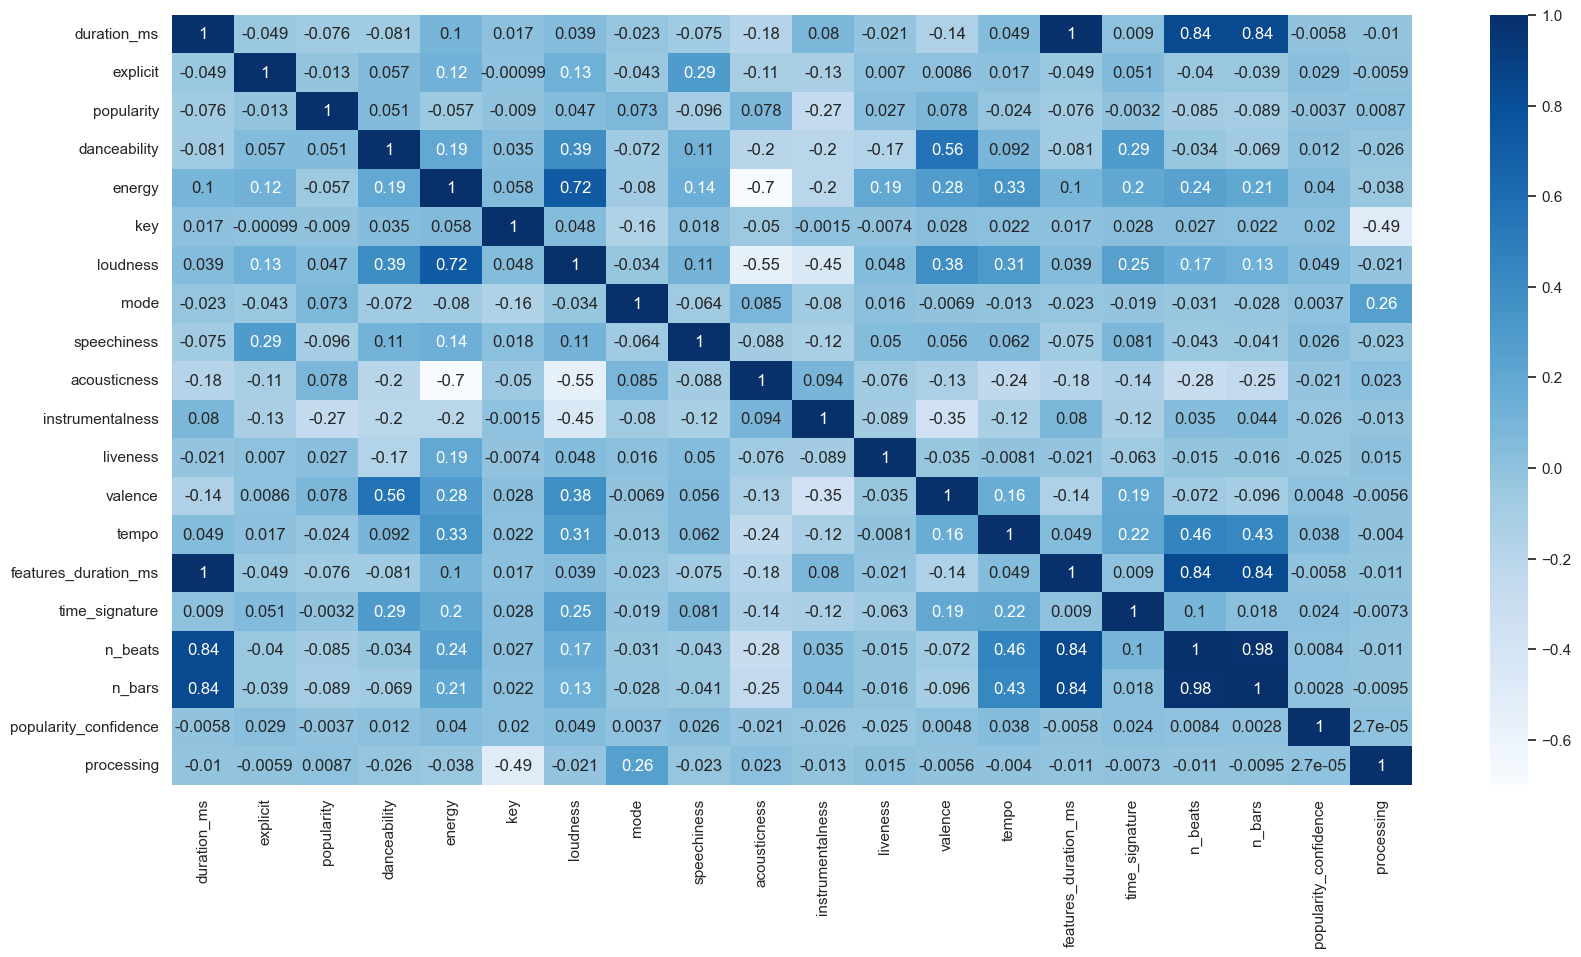

In [41]:
# correlation
corr = df.corr()
sns.set(rc={'figure.figsize': (20,10)}) 
sns.heatmap(corr, annot=True, cmap='Blues')

### controlliamo se ci sono righe duplicate

In [42]:
duplicates = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows except first occurrence based on all columns:")
print(duplicates)

Duplicate Rows except first occurrence based on all columns:
Empty DataFrame
Columns: [name, duration_ms, explicit, popularity, artists, album_name, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, features_duration_ms, time_signature, n_beats, n_bars, popularity_confidence, processing, genre]
Index: []

[0 rows x 24 columns]


In [43]:
#ok perfetto non ci sono righe duplicate

In [44]:
df.shape

(15000, 24)

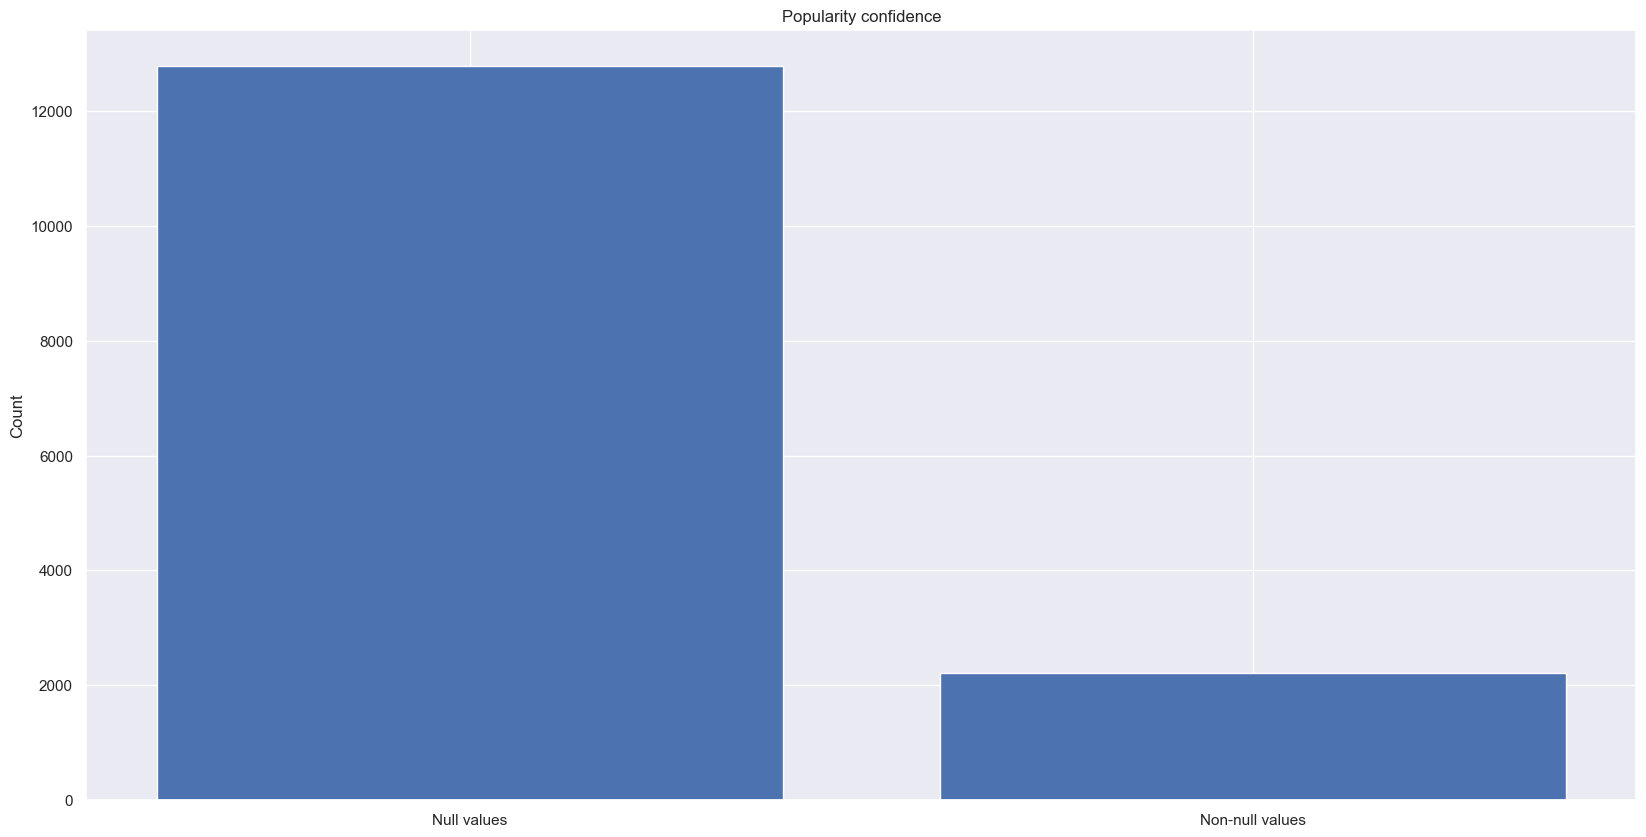

In [45]:
#popularity_confidence 
#ha 12783 Nan su 15000, il 85,22% sono Nan 
missing_values_pop_conf=df['popularity_confidence'].isnull().sum()
data=df['popularity_confidence'].shape[0]
non_null=data-missing_values_pop_conf
objects = ("Null values", "Non-null values")

y_pos = np.arange(len(objects))
performance = [missing_values_pop_conf,non_null]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Popularity confidence')

plt.show()

#istogramma con valori nulli e non nulli della variabile Popularity confidence 
#per far vedere che effettivamete ci sono tantissimi Nan

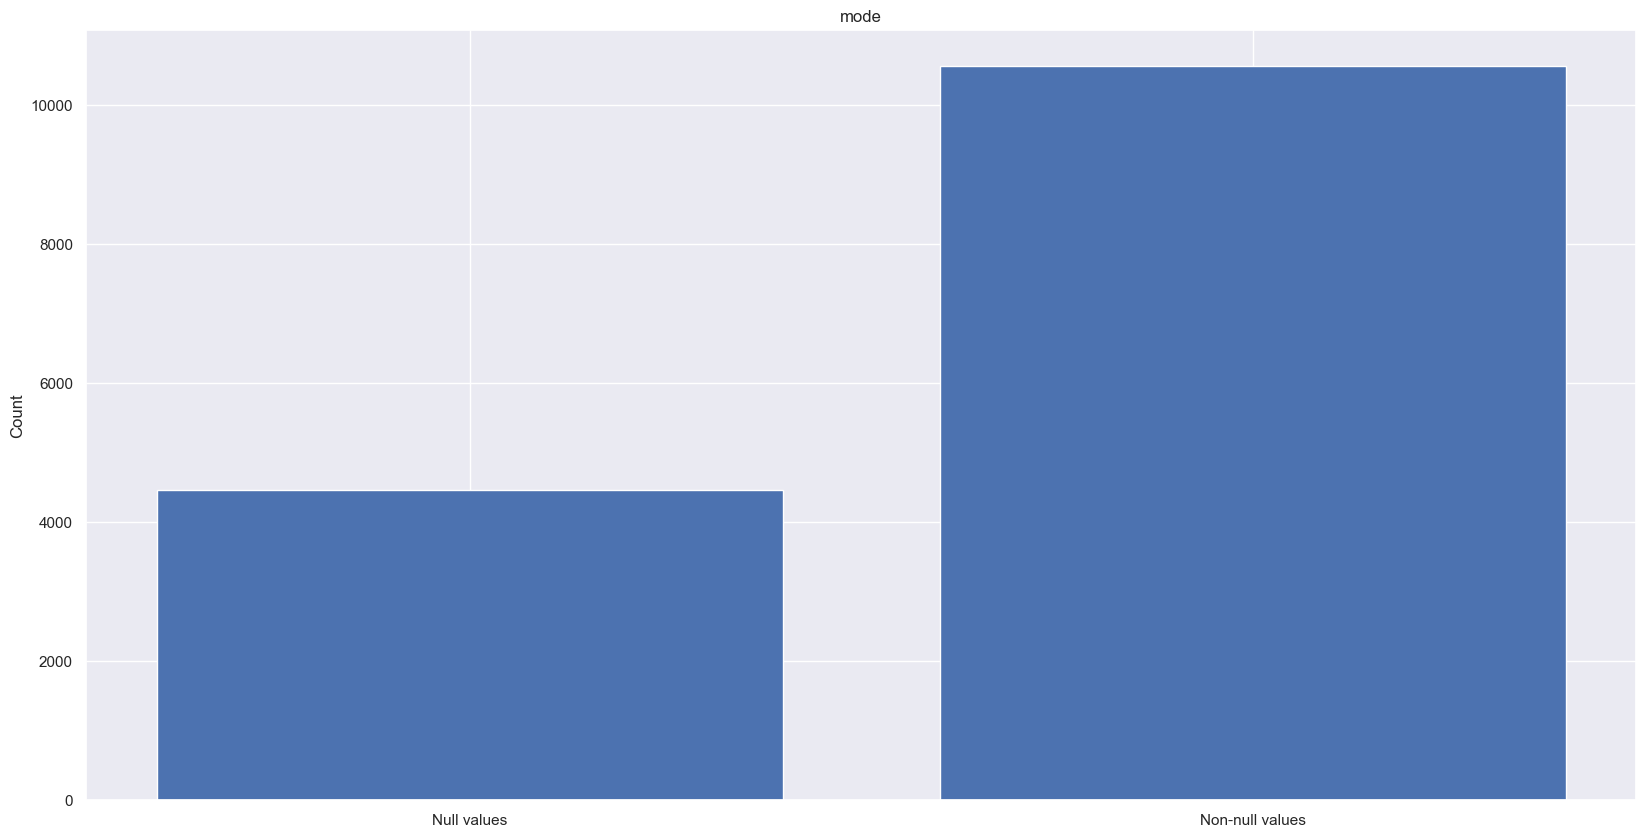

In [46]:
#mode
#ha 4450 Nan su 15000, il 29,67% sono Nan
missing_values_mode=df['mode'].isnull().sum()
data=df['mode'].shape[0]
non_null=data-missing_values_mode
objects = ("Null values", "Non-null values")

y_pos = np.arange(len(objects))
performance = [missing_values_mode,non_null]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('mode')

plt.show()

#istogramma con valori nulli e non nulli della variabile mode 
#per far vedere che effettivamete quanti Nan ci sono 

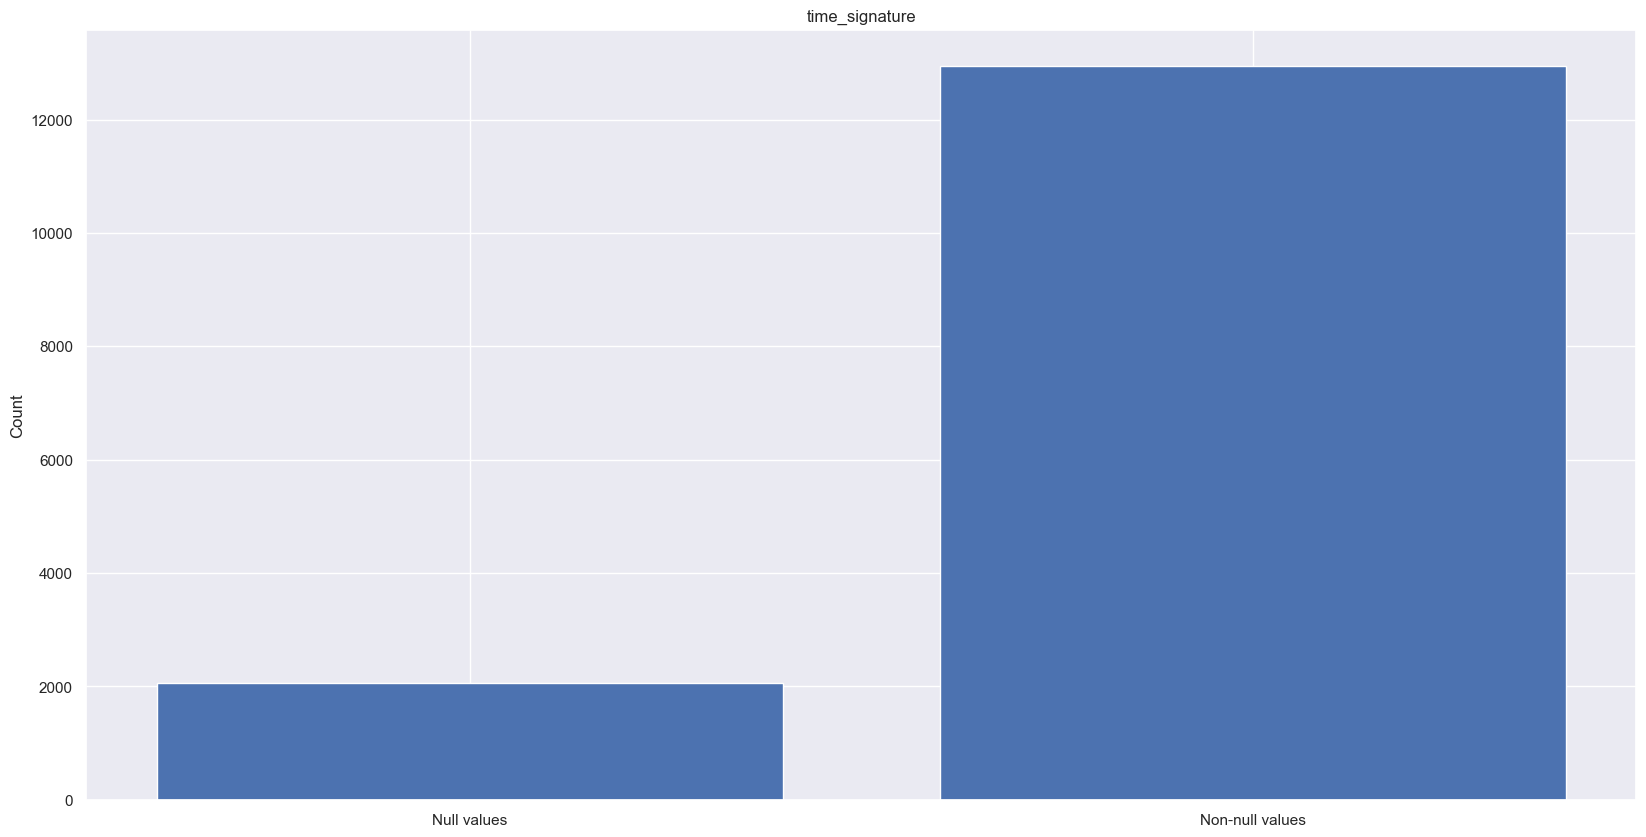

In [47]:
#time_signature
#time_signature: An estimated time signature.
#ha 2062 Nan su 15000, il 13,75% di valori sono Nan
missing_values_time_signature=df['time_signature'].isnull().sum()
data=df['time_signature'].shape[0]
non_null=data-missing_values_time_signature
objects = ("Null values", "Non-null values")

y_pos = np.arange(len(objects))
performance = [missing_values_time_signature,non_null]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('time_signature')

plt.show()

#istogramma con valori nulli e non nulli della variabile time_signature
#per far vedere che effettivamete quanti Nan ci sono 

## ricerca degli outlier 

In [48]:
#Deviazione standard: 
#Puoi calcolare i valori outlier basandoti sulla deviazione standard. 
#Ad esempio, i valori che sono oltre una certa quantità di deviazioni standard dalla media potrebbero essere considerati outlier. Ecco un esempio:
#python


In [49]:
duration_ms_mean = round(df['duration_ms'].mean(), 2)
duration_ms_mean

246807.48

In [50]:
#x vedere gli outlier 
#duration_ms = The track length in milliseconds


mean = df['duration_ms'].mean()
std = df['duration_ms'].std()
threshold = 2  # Modifica questa soglia secondo le tue esigenze
outliers = df[(df['duration_ms'] > mean + threshold * std) | (df['duration_ms'] < mean - threshold * std)]

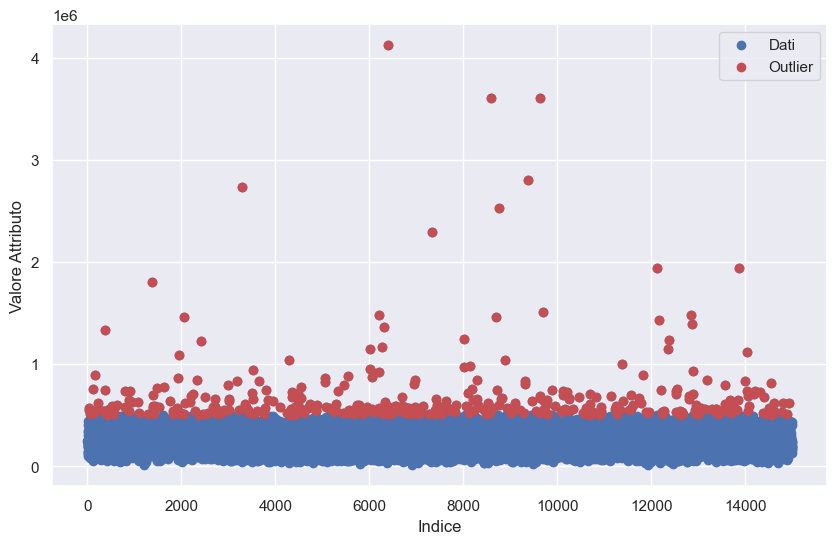

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['duration_ms'], label='Dati')
plt.scatter(outliers.index, outliers['duration_ms'], color='r', label='Outlier')
plt.xlabel('Indice')
plt.ylabel('Valore Attributo')
plt.legend()
plt.show()

#questo fa schifo non lo guardate 

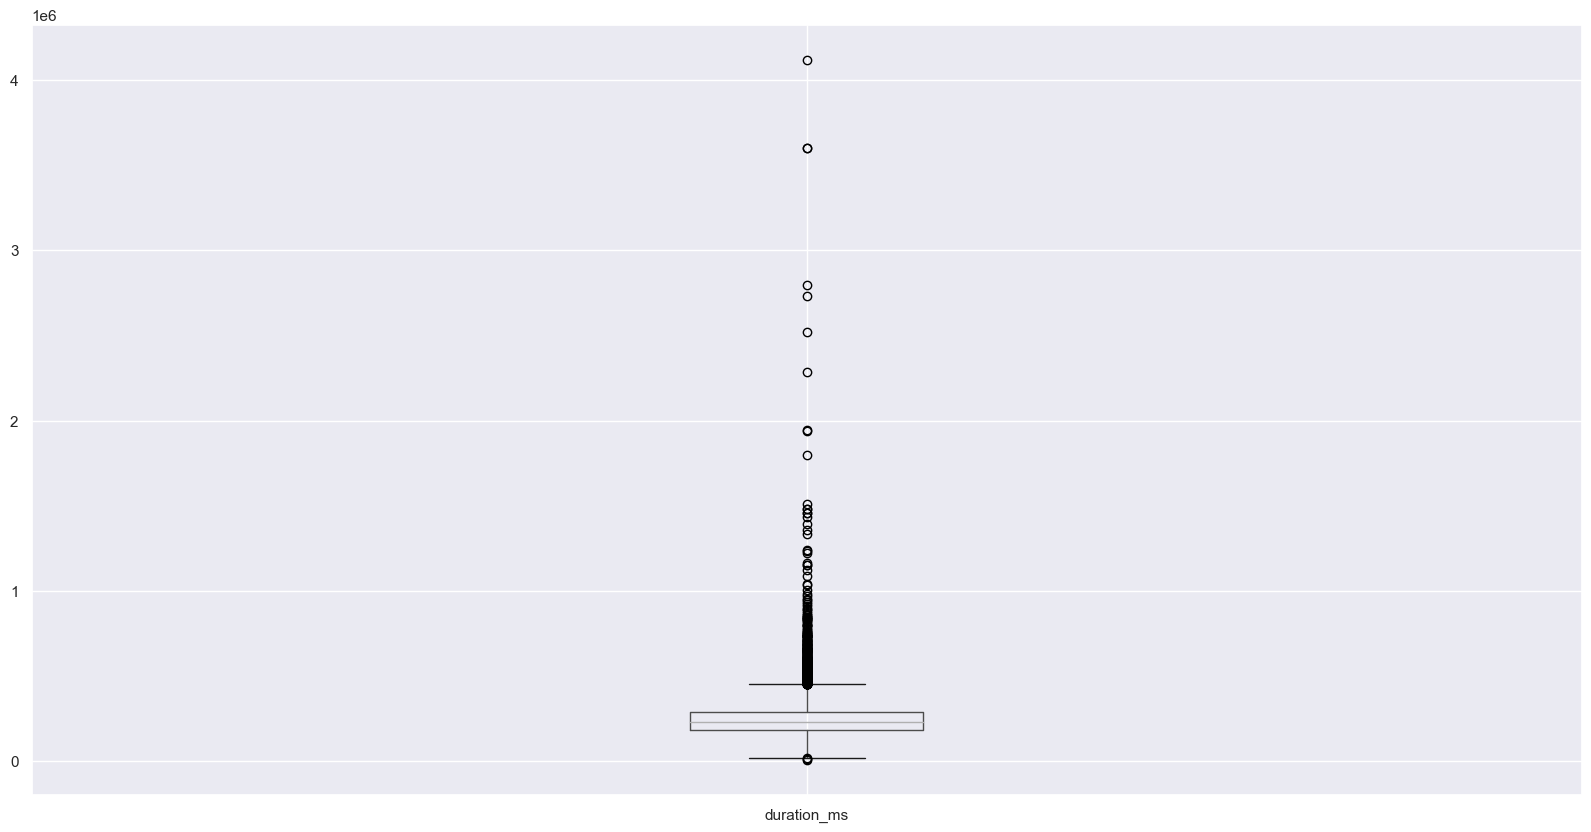

In [52]:
boxplot = df.boxplot(column=['duration_ms'])

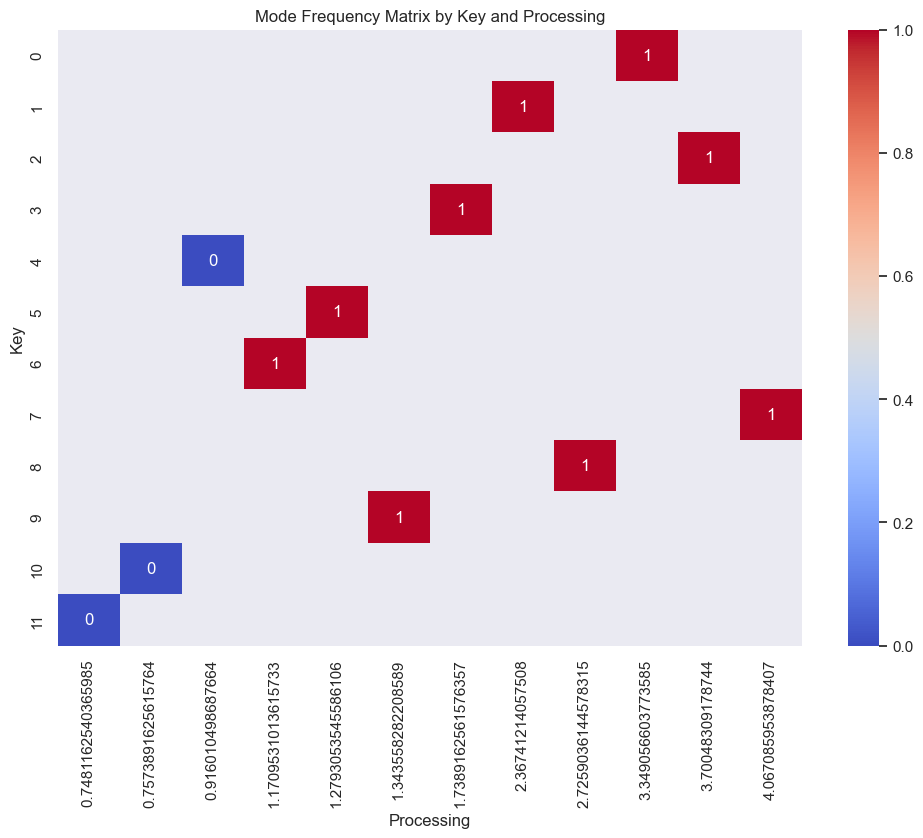

In [53]:
def calc_mode(series):
    if len(series.mode()) > 0:
        return series.mode()[0]
    else:
        return np.nan

# Create the pivot table
mode_pivot_table = df.dropna(subset=['mode']).pivot_table(
    index='key', 
    columns='processing', 
    values='mode', 
    aggfunc=calc_mode, 
    fill_value=np.nan
)

# Plot the matrix
plt.figure(figsize=(12, 8))
sns.heatmap(mode_pivot_table, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Mode Frequency Matrix by Key and Processing')
plt.xlabel('Processing')
plt.ylabel('Key')
plt.show()

In [58]:
# Impute the missing values in 'mode'
for idx, row in df[df['mode'].isnull()].iterrows():
    key = row['key']
    processing = row['processing']
    # Try to get the mode from the pivot table
    if pd.notnull(mode_pivot_table.loc[key, processing]):
        df.at[idx, 'mode'] = mode_pivot_table.loc[key, processing]
    else:
        # If the mode is not available, use the overall mode
        df.at[idx, 'mode'] = df['mode'].mode()[0]

# Verify there are no more missing values in 'mode'
assert df['mode'].isnull().sum() == 0
df.corr()


,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,1.000000,-0.048723,-0.076202,-0.080932,0.102996,0.016712,0.039403,-0.016645,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.005830,-0.010400
explicit,-0.048723,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.027404,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,-0.048699,0.051260,-0.039830,-0.039435,0.029119,-0.005878
popularity,-0.076202,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.056281,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,-0.003665,0.008733
danceability,-0.080932,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.058215,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.011602,-0.026273
energy,0.102996,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.069140,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.040022,-0.037847
key,0.016712,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.235869,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.016786,0.028388,0.027133,0.022042,0.019790,-0.490366
loudness,0.039403,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.032519,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.049174,-0.020563
mode,-0.016645,-0.027404,0.056281,-0.058215,-0.069140,-0.235869,-0.032519,1.000000,-0.046989,0.070633,-0.057454,0.013727,-0.001860,-0.012115,-0.016736,-0.010908,-0.024139,-0.020922,0.001563,0.349916
speechiness,-0.074774,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.046989,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.026399,-0.022909
acousticness,-0.184902,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.070633,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.021155,0.022684


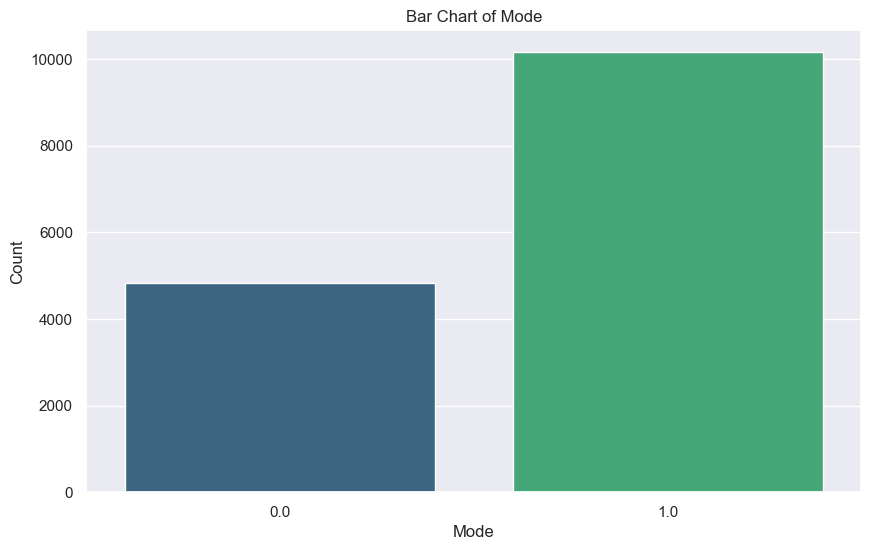

In [64]:
mode_counts = df['mode'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mode_counts.index, y=mode_counts.values, palette="viridis")

# Adding the aesthetics
plt.title('Bar Chart of Mode')
plt.xlabel('Mode')
plt.ylabel('Count')

# Show the plot
plt.show()